Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 9**: Consider a set of coupled first-order differential equations, typically called 'rate equations'. Let the two ODE's be $$\frac{dy_{1}}{dt}=-k_{1}\,y_{1}$$ and $$\frac{dy_{2}}{dt}=k_{1}\,y_{1} - k_{2}\,y_{2}$$ where $k_{1,2}$ are rate constants. 

**Data**: Take $k_{1}=0.2$ s$^{-1}$ and $k_{2}=0.8$ s$^{-1}$. Initial conditions shall be $y_{1}(0)=100$ and $y_{2}(0)=0$ and $0\leq{}t\leq{}20$.

**Task**: Write a function `rateEqns(init, time, k1, k2)` with the array of initial conditions, the time array and the rate constants $k_{1}$ and $k_{2}$ as input. Let the function solve the rate equation ODE's and return the full `solve_ivp` output.

Plot the solutions (with different markers) with suitable axes labels, a legend and a title. Also include a plot of loss feed, i.e. $L(t) = y_{1}(0) - y_{1}(t) - y_{2}(t)$.

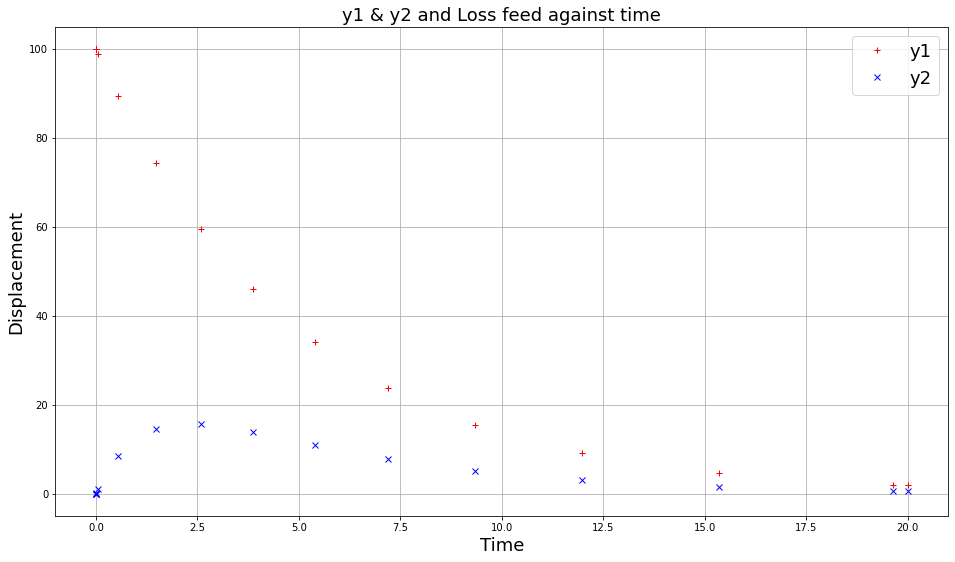

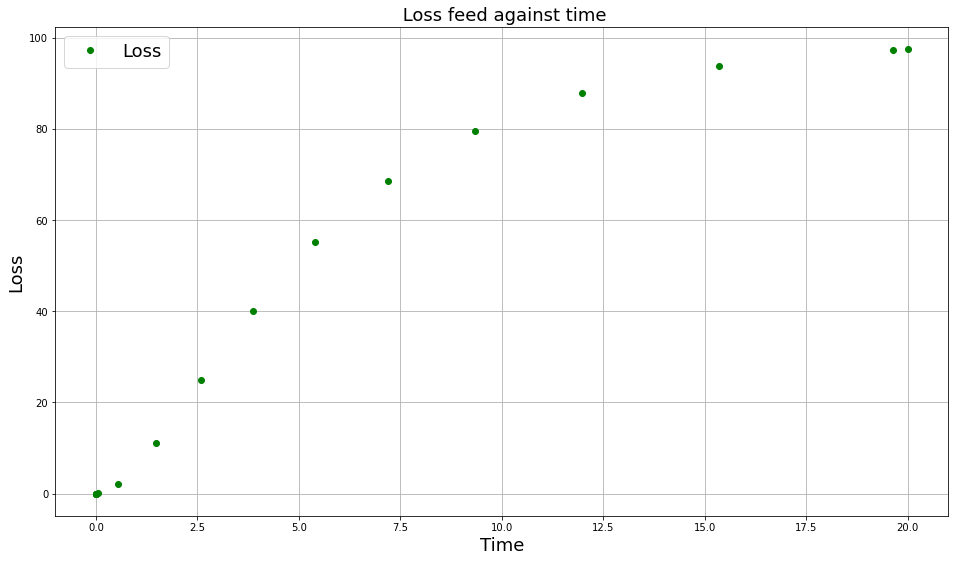

In [1]:
# YOUR CODE HERE
""" My Code """
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def rateq(t, y, k_1, k_2):
    """Our literal ODEs"""
    _ = t
    dy_1 = -k_1 * y[0]
    dy_2 = k_1 * y[0] - k_2 * y[1]
    return [dy_1, dy_2]


def rateEqns(initial, time, k_1, k_2):
    """Rate Eqn"""
    return solve_ivp(rateq, time, initial, args=(k_1, k_2))


# Actual Data
k1 = 0.2
k2 = 0.8
y10 = 100
y20 = 0
init = np.array([y10, y20])
answer = rateEqns(init, [0, 20], k1, k2)
loss = y10 - answer.y[0] - answer.y[1]
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("y1 & y2 and Loss feed against time", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Displacement", fontsize=18)
plt.plot(answer.t, answer.y[0], "r+", label="y1")
plt.plot(answer.t, answer.y[1], "bx", label="y2")
plt.legend(fontsize=18)
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title(" Loss feed against time", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.plot(answer.t, loss, "go", label="Loss")
plt.legend(fontsize=18)
plt.show()


In [2]:
# Test cell
k1 = 0.2
k2 = 0.8
y10 = 100
y20 = 0
init = np.array([y10, y20])
answer = rateEqns(init, [0,20], k1, k2)
# 1
loss = y10 - answer.y[0] - answer.y[1]
assert (loss[10]>68.0 and loss[10]<69.0), 'wrong loss value'

In [3]:
# Test cell
assert (answer.y[0][5]>89.0 and answer.y[0][5]<90), 'wrong solution value'
assert (answer.y[1][5]>8.4 and answer.y[1][5]<8.5), 'wrong solution value'

### Tests 2 marks; Style 1 mark; Plot - 2 marks